<a href="https://colab.research.google.com/github/Allavudeen/MachineLearning/blob/main/Haralick%20Texture/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Allavudeen/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 172 (delta 53), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (172/172), 10.93 MiB | 21.91 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [1]:
!pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.4 MB/s eta 0:00:00


In [3]:
from sklearn.svm import LinearSVC
import glob
import cv2
import mahotas
from sklearn.linear_model import LogisticRegression
from google.colab.patches import cv2_imshow


In [4]:
data=[]
labels=[]

In [9]:
for imagePath in glob.glob("MachineLearning/Haralick Texture/training" + "/*.png"):
  # load the image, convert it to gray scale, and extract the texture
  # name from the file name
  image = cv2.imread(imagePath)
  #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  texture = imagePath[imagePath.rfind("/") + 1:].split("_")[0]

  # extract Haralick texture features in 4 directions, then take the mean of each direction
  features = mahotas.features.haralick(image).mean(axis=0)

  # update the data and labels lists
  data.append(features)
  labels.append(texture)

  # update the data and labels
  data.append(features)
  labels.append(texture)


In [10]:
print("[INFO] training model...")
model = LogisticRegression()#solver="lbfgs", multi_class="auto")
model.fit(data, labels)
print("[INFO] classifyin...")

[INFO] training model...
[INFO] classifyin...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


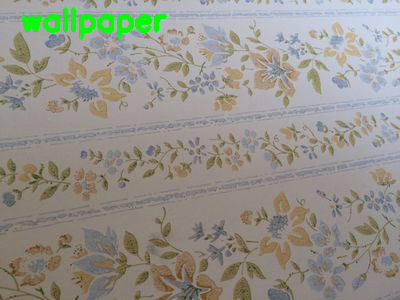

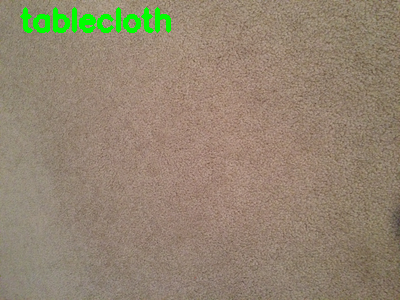

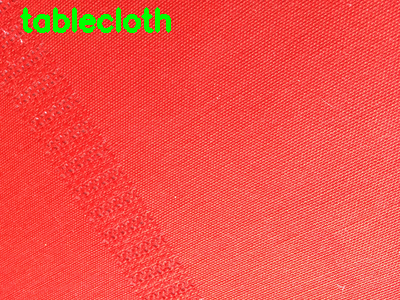

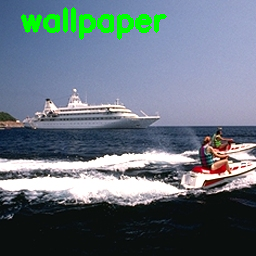

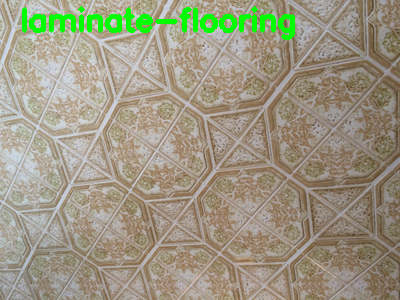

In [14]:
for imagePath in glob.glob("MachineLearning/Haralick Texture/testing" + "/*.png"):
  # load the image, convert it to grayscale, and extract Haralick
  # texture from the test image
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  features = mahotas.features.haralick(gray).mean(axis=0)

  #classify the test image
  pred =  model.predict(features.reshape(1,-1))[0]
  cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)
  #print(pred)
  cv2_imshow(image)